In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [140]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
heart_disease = pd.read_csv('/Users/sanyamsinghchauhan/Downloads/heart.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [142]:
heart_disease = heart_disease.iloc[:,[0,1,2,7,8,9,10,11,12,13]]

<Axes: >

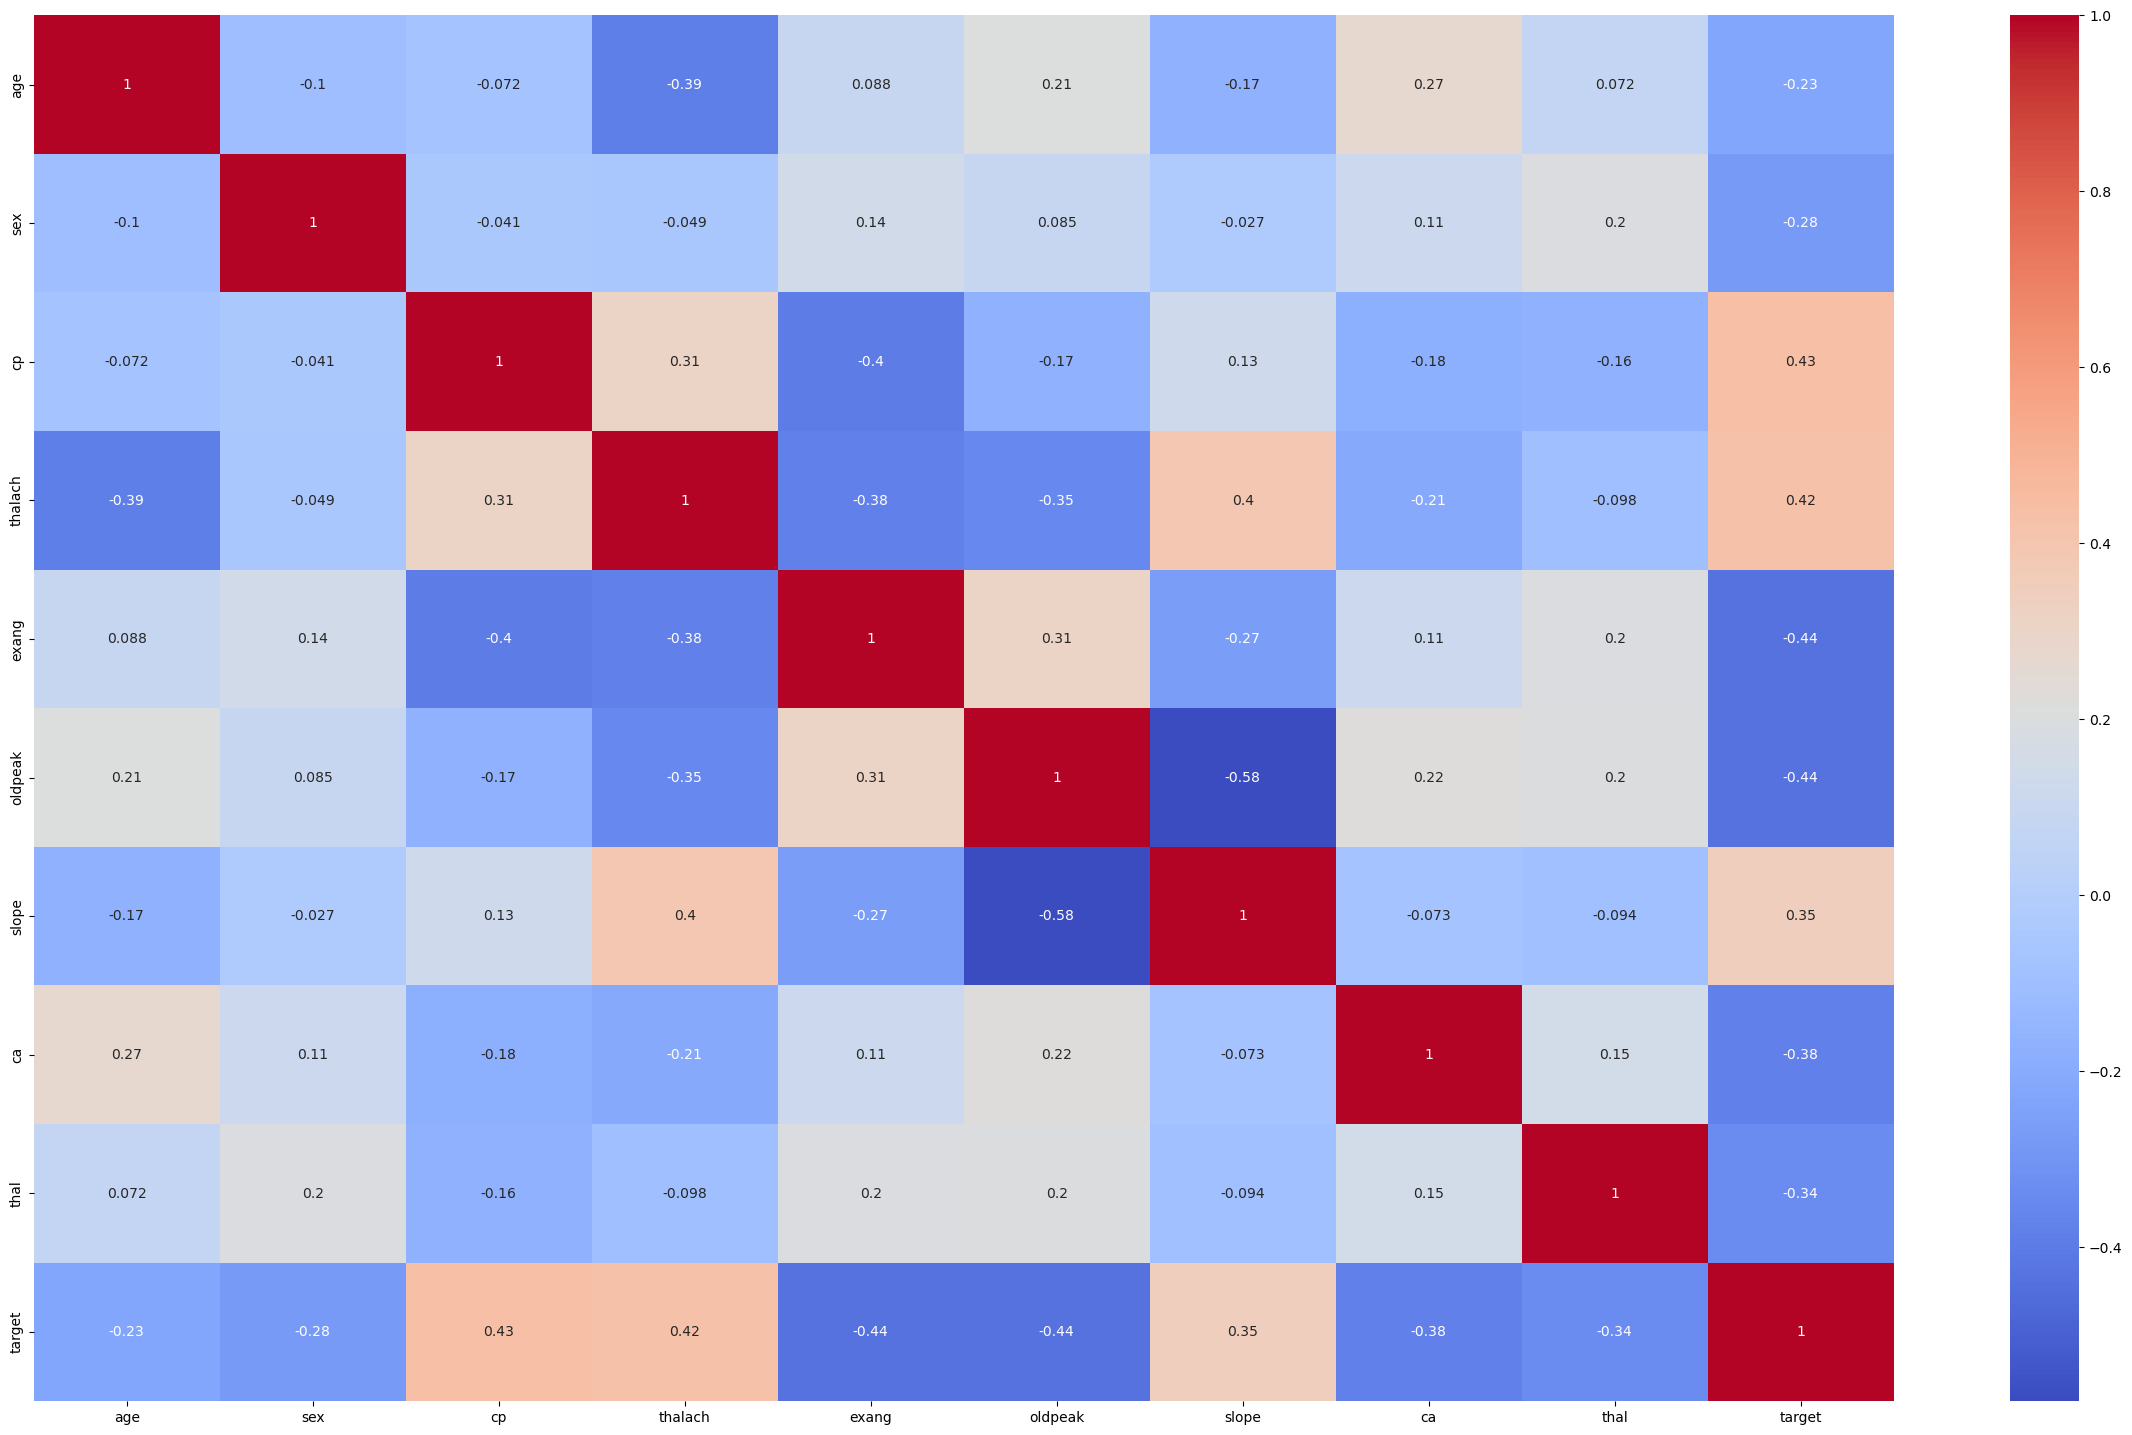

In [113]:
plt.figure(figsize=(30,18))
sns.heatmap(heart_disease.corr(),cmap='coolwarm',annot= True)

In [4]:
heart_disease.shape

(1025, 10)

<Axes: >

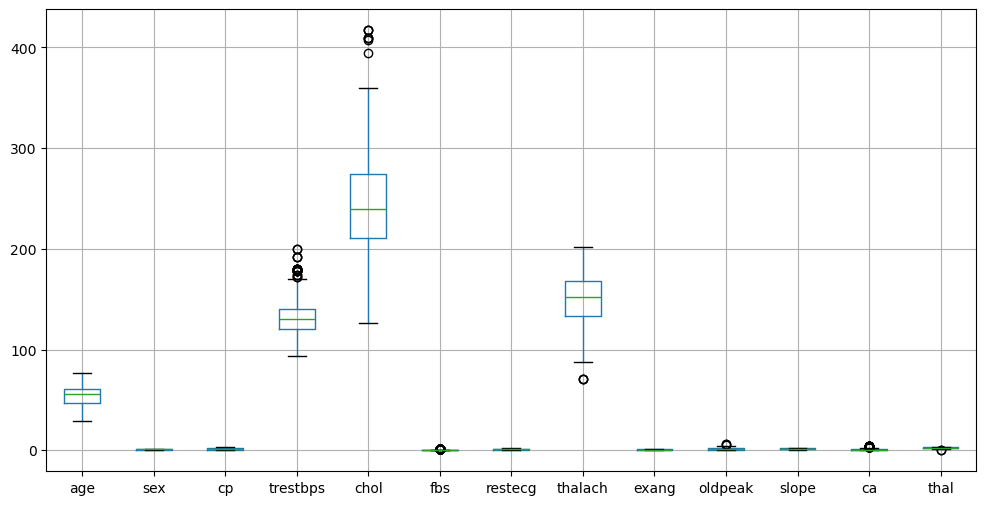

In [66]:
plt.figure(figsize=(12,6))
f_train.boxplot()

In [22]:
heart_disease['thal'].unique()

array([3, 2, 1, 0])

In [25]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [114]:
f = heart_disease.iloc[:,:-1]
t = heart_disease.iloc[:,-1]
from sklearn.model_selection import train_test_split
f_train,f_test,t_train,t_test=train_test_split(f,t,test_size=0.25,random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression()
dt_clf =  DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_estimators=50)
knn_clf = KNeighborsClassifier()

In [116]:
lr_clf.fit(f_train,t_train)

/Users/sanyamsinghchauhan/tensorflow-test/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
dt_clf.fit(f_train,t_train)

DecisionTreeClassifier()

In [118]:
rf_clf.fit(f_train,t_train)

RandomForestClassifier(n_estimators=50)

In [119]:
knn_clf.fit(f_train,t_train)

KNeighborsClassifier()

In [120]:
lr_t_predict = lr_clf.predict(f_test)
dt_t_predict = dt_clf.predict(f_test)
rf_t_predict = rf_clf.predict(f_test)
knn_t_predict = knn_clf.predict(f_test)

In [121]:
print('lr = ' + str(lr_clf.score(f_test,t_test)))
print('DT_acc = ' + str(dt_clf.score(f_test,t_test)))
print('RF_acc = ' + str(rf_clf.score(f_test,t_test)))
print('KNN_acc = ' + str(knn_clf.score(f_test,t_test)))

lr = 0.8093385214007782
DT_acc = 0.9649805447470817
RF_acc = 0.9766536964980544
KNN_acc = 0.7821011673151751


## Now lets start use with using Standardizing the quantities and performing pipelines

In [122]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [124]:
pipe_lr = Pipeline([('scale', StandardScaler()),('Logistical', LogisticRegression())])
pipe_lr.fit(f_train,t_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('Logistical', LogisticRegression())])

In [125]:
pipe_lr.score(f_test,t_test)

0.8093385214007782

In [126]:
pipe_dt = Pipeline([('scale',StandardScaler()),('Decision Tree',DecisionTreeClassifier())])
pipe_dt.fit(f_train,t_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier())])

In [127]:
pipe_dt.score(f_test,t_test)

0.9649805447470817

In [128]:
pipe_rf = Pipeline([('scale',StandardScaler()),('Random Forest',RandomForestClassifier())])
pipe_rf.fit(f_train,t_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('Random Forest', RandomForestClassifier())])

In [129]:
pipe_rf.score(f_test,t_test)

0.9766536964980544

In [ ]:
## We will be using GridSearchCV for the KNN process as we are getting low accuracy.

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
para_search = {'n_jobs':[0,10,15,-1] }
search_knn= GridSearchCV(knn_clf,para_search,cv=5)
search_knn.fit(f_train,t_train)

/Users/sanyamsinghchauhan/tensorflow-test/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanyamsinghchauhan/tensorflow-test/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/sanyamsinghchauhan/tensorflow-test/env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/sanyamsinghchauhan/tensorflow-test/env/lib/python3.10/site-packages/sklearn/base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/sanyamsinghchauhan/tensorflow-test/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 271, in predict
    

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [0, 10, 15, -1]})

In [132]:
search_knn.score(f_test,t_test)

0.7821011673151751

In [133]:
print(search_knn.best_params_)

{'n_jobs': 10}
